In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/house_price.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   object
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


In [9]:
DF = DF[['neighborhood','area','bedrooms','bathrooms','style','price']]
DF.head()

,neighborhood,area,bedrooms,bathrooms,style,price
0,B,1188,3,2,ranch,598291
1,B,3512,5,3,victorian,1744259
2,B,1134,3,2,ranch,571669
3,A,1940,4,2,ranch,493675
4,B,2208,6,4,victorian,1101539


In [13]:
DF['style'].value_counts()

victorian    2997
ranch        1802
lodge        1229
Name: style, dtype: int64

In [14]:
DF.neighborhood.value_counts()

B    2427
A    1876
C    1725
Name: neighborhood, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

x = DF[['style']]
y = DF[['neighborhood']]

encoder = LabelEncoder()
style = encoder.fit_transform(x)
neighborhood = encoder.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
DF[['style']] = style

In [19]:
DF[['style']].head()

,style
0,1
1,2
2,1
3,1
4,2


In [20]:
DF[['neighborhood']] = neighborhood

In [21]:
DF[['neighborhood']].head()

,neighborhood
0,1
1,1
2,1
3,0
4,1


In [22]:
DF[['neighborhood']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   neighborhood  6028 non-null   int64
dtypes: int64(1)
memory usage: 47.2 KB


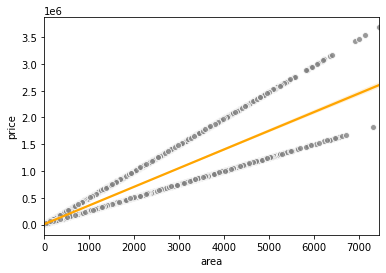

In [36]:
sns.regplot(x='area', y='price', data=DF, line_kws={'color':'orange'},
            scatter_kws={'color':'gray','edgecolor':'white'})
plt.show()

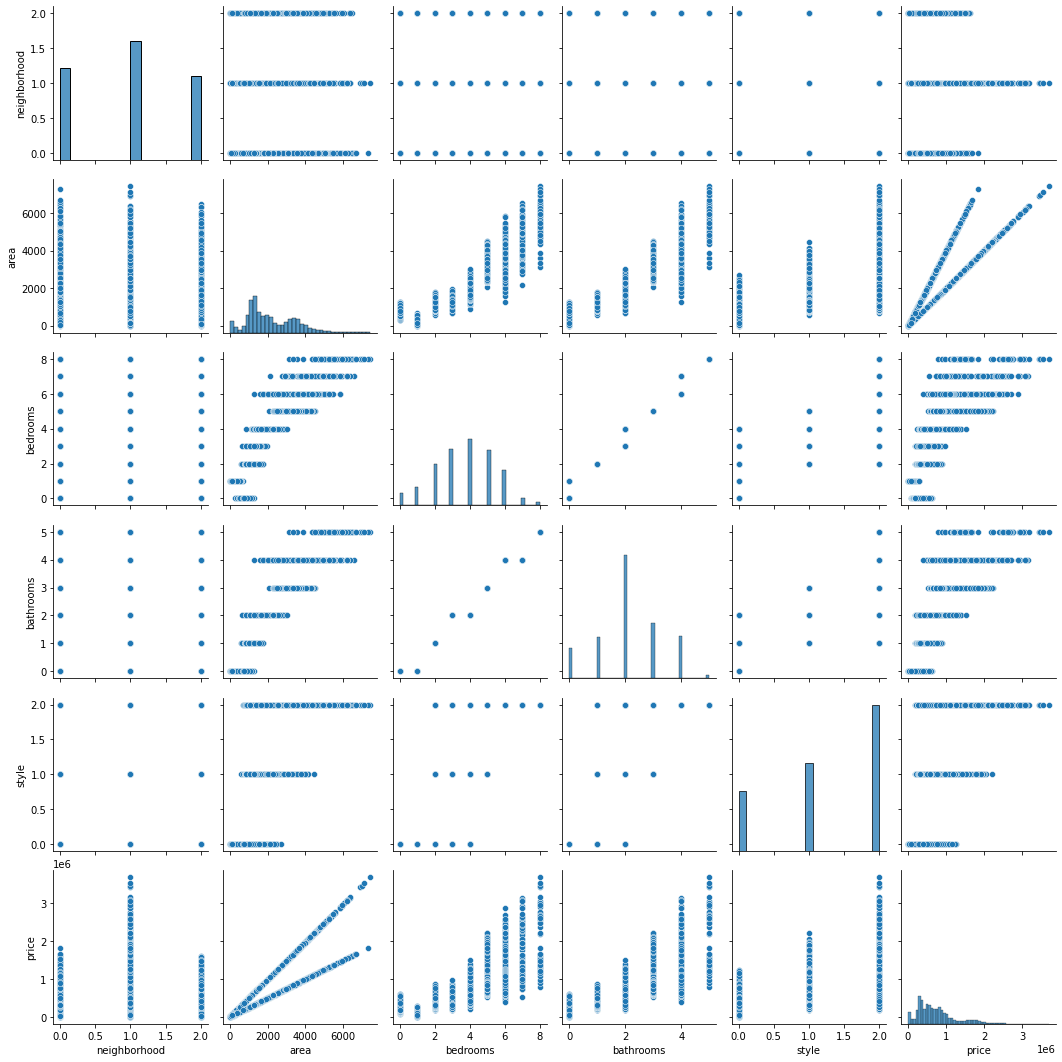

In [23]:
sns.pairplot(DF)
plt.show()

In [87]:
from sklearn.model_selection import train_test_split

x = DF[['area']]
y = DF[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2045)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


In [88]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(x_train, y_train)

y_hat_1 = Model_1.predict(x_test)

from sklearn.metrics import mean_squared_error
Err_1 = mean_squared_error(y_test, y_hat_1)
Err_1

88607832178.18301

In [89]:
Model_1.score(x_test, y_test)

0.6784229855524156

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


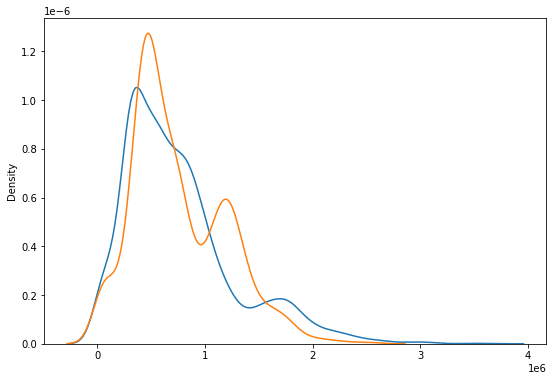

In [90]:
plt.figure(figsize = (9,6))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat_1, hist=False, label='y_hat', ax=ax1)
plt.show()

In [91]:
def reg_plot(x):
  sns.regplot(x = 'bedrooms', y='price', data=DF,
            line_kws = {'color':'red'},
            order = x,
            scatter_kws = {'edgecolor':'white'}) # 동그라미(scatter)의 edge 색깔
  #plt.xlim(505, 820)    
  #plt.ylim(50, 450)        
  plt.show()

from ipywidgets import interact

order = [1,2,5]
interact(reg_plot, x = order)

interactive(children=(Dropdown(description='x', options=(1, 2, 5), value=1), Output()), _dom_classes=('widget-…

<function __main__.reg_plot>

In [92]:
x = DF[['bedrooms']]
y = DF['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Model_2 = LinearRegression()
Model_2.fit(x_train, y_train)

y_hat_2= Model_bed.predict(x_test)
Err_2 = mean_squared_error(y_test, y_hat_2)
Err_2

Train Data :  (4219, 1) (4219,)
Test Data :  (1809, 1) (1809,)


124617371698.03279

In [93]:
Model_2.score(x_test, y_test)

0.5477365673683041

In [94]:
x = DF[['bedrooms']]
y = DF['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
PX_2 = poly.fit_transform(x_train)

Model_3 = LinearRegression()
Model_3.fit(PX_2, y_train)

PX_2_test = poly.fit_transform(x_test)
y_hat_3= Model_3.predict(PX_2_test)
Err_3 = mean_squared_error(y_test, y_hat_3)
Err_3

Train Data :  (4219, 1) (4219,)
Test Data :  (1809, 1) (1809,)


115865636713.87029

In [96]:
Model_3.score(PX_2_test, y_test)

0.5794985091544886

In [97]:
x = DF[['bedrooms', 'bathrooms']]
y = DF['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Model_4 = LinearRegression()
Model_4.fit(x_train, y_train)

y_hat_4= Model_4.predict(x_test)
Err_4 = mean_squared_error(y_test, y_hat_4)
Err_4

Train Data :  (4219, 2) (4219,)
Test Data :  (1809, 2) (1809,)


123758715850.91988

In [98]:
Model_4.score(x_test, y_test)

0.5508528154128027

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


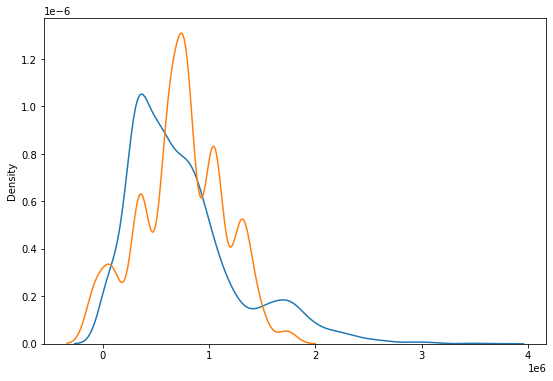

In [48]:
plt.figure(figsize = (9,6))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat_BB, hist=False, label='y_hat_BB', ax=ax1)
plt.show()

In [99]:
x = DF[['bedrooms','bathrooms', 'area']]
y = DF['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Model_5 = LinearRegression()
Model_5.fit(x_train, y_train)

y_hat_5= Model_5.predict(x_test)
Err5 = mean_squared_error(y_test, y_hat_5)
Err5

Train Data :  (4219, 3) (4219,)
Test Data :  (1809, 3) (1809,)


88676993413.81879

In [100]:
Model_5.score(x_test, y_test)

0.6781719844487373

In [49]:
DF[['neighborhood']].head()

,neighborhood
0,1
1,1
2,1
3,0
4,1


In [101]:
x = DF[['neighborhood']]
y = DF['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Model_6 = LinearRegression()
Model_6.fit(x_train, y_train)

y_hat_6= Model_6.predict(x_test)
Err6= mean_squared_error(y_test, y_hat_6)
Err6

Train Data :  (4219, 1) (4219,)
Test Data :  (1809, 1) (1809,)


275470408658.34265

In [102]:
Model_6.score(x_test, y_test)

0.00025822314590850937